# The Cancer Gene Atlas Cancer (TCGA) - Pancreatic Adenocarcinoma (PAAD)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
seaborn 0.7.1
Wed May 02 14:21:07 2018 EDT

# Functions

In [7]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [8]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [9]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [10]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [11]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [12]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [13]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [14]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [15]:
sample_meta = pd.read_csv('Input/metadata_Pancreatic adenocarcinoma [PAAD]', sep='\t', index_col=1)

In [16]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AABI,3440,PAAD,TCGA,2AAF212F-000A-4A9D-8A4A-198FA94F491E,2J,55.0,Head of Pancreas,424,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,2004.0,NaN,1973.0
TCGA-2J-AAB1,3441,PAAD,TCGA,75119D1A-93E5-4AE7-9D60-69EE929A0772,2J,65.0,Head of Pancreas,424,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,1988.0,NaN,1962.0
TCGA-2J-AABT,3442,PAAD,TCGA,3F9CC59E-9F7D-40D1-9365-28B40DFF3C59,2J,72.0,Head of Pancreas,424,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,"Yes, History of Prior Malignancy",Breast,"Other, specify",Prior Malignancy,NaN,NaN,NaN
TCGA-2J-AABO,3443,PAAD,TCGA,A8C3E333-865D-4060-8CE4-453AA6F9F0E8,2J,43.0,Head of Pancreas,424,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,2003.0,NaN,1993.0
TCGA-2J-AABF,3444,PAAD,TCGA,886D6116-D496-444F-9B7B-7449DAD31055,2J,73.0,Head of Pancreas,424,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,1965.0,NaN,1960.0


In [17]:
sample_meta.shape

(185, 70)

# Load Data

In [18]:
matrix = pd.read_csv('Input/TCGA_PAAD_tpm.tsv', sep='\t', index_col=0)

In [19]:
matrix.head()

,e18146e8-a229-409e-925a-513070ca6699,00d7d2f8-76a5-4d25-8cd3-20a16835c0ca,7f1dd62c-ae61-4bfe-8a97-4083b3cf9524,8d6f905c-5f30-499a-9575-feedcd0d3e63,9be5cd87-5b2e-4f70-8374-d84f6c92524e,f0d30cb3-982d-4abc-875d-a4da6ddd0180,5e80ba81-5639-4942-a28c-2c6bd08ecef0,11391e2f-48be-45df-ac1a-33eea02b850f,64ebad36-7233-4f03-8a8f-d2465ed46d34,a3db2cfd-fb63-4646-8000-b6dbceb2f826,...,491fdc3e-9f59-417c-bce7-d2816abf95fc,0083370e-c824-4d35-bac2-95ece7b63008,c0e4f0e7-70e6-4939-8931-7f49bb2f8e33,0c022729-7143-4bfc-827b-b0101fe7e2b2,86eb0714-5c5c-4313-bb45-7640313ecfbe,367a4d36-f16f-44b9-b508-17f5f62e87b2,ee9f3d43-84a1-4903-a3ee-d66d58843459,ecd94d6e-2ae2-4b04-8d97-87dcedf0b79b,6f1ce8dd-f785-48f0-a3e7-2ab575bbe82b,834252fb-10e3-4faf-b642-39bf83cf618a
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,104.328000,157.38000,181.535000,153.829000,152.723000,168.84700,122.88400,136.936000,121.73000,171.336000,...,204.125000,170.275000,149.610000,145.200000,154.838000,155.51700,162.287000,256.200000,154.928000,180.589000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,30.782400,30.77750,33.749600,37.642500,51.892800,39.39980,30.41050,34.858100,29.33670,32.353900,...,25.418800,17.521800,39.422100,42.988200,18.158900,45.27130,38.628900,18.698800,36.795800,13.784500
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,14.132100,16.29570,21.593600,29.199100,33.140900,26.55160,21.31710,23.602200,25.33000,32.395600,...,39.282400,13.389000,16.838100,24.750300,22.846800,10.72130,16.972400,22.613600,25.304900,8.429720
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,25.068400,16.81110,22.318900,29.915200,55.163000,25.03970,22.10300,31.193400,26.32530,36.830200,...,43.228000,12.516700,39.537900,52.565800,23.314200,90.75590,39.692200,27.430900,26.961300,26.937300
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.138257,1.59169,0.625517,0.596265,0.329335,1.06808,0.38204,0.302371,1.49731,0.189819,...,0.223677,0.227768,0.113588,0.196664,0.173953,1.08519,0.181531,0.098933,0.781923,0.535095


In [20]:
matrix.shape

(199169, 183)

# Get Only Protein Coding Genes

In [21]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [22]:
matrix.head()

,e18146e8-a229-409e-925a-513070ca6699,00d7d2f8-76a5-4d25-8cd3-20a16835c0ca,7f1dd62c-ae61-4bfe-8a97-4083b3cf9524,8d6f905c-5f30-499a-9575-feedcd0d3e63,9be5cd87-5b2e-4f70-8374-d84f6c92524e,f0d30cb3-982d-4abc-875d-a4da6ddd0180,5e80ba81-5639-4942-a28c-2c6bd08ecef0,11391e2f-48be-45df-ac1a-33eea02b850f,64ebad36-7233-4f03-8a8f-d2465ed46d34,a3db2cfd-fb63-4646-8000-b6dbceb2f826,...,491fdc3e-9f59-417c-bce7-d2816abf95fc,0083370e-c824-4d35-bac2-95ece7b63008,c0e4f0e7-70e6-4939-8931-7f49bb2f8e33,0c022729-7143-4bfc-827b-b0101fe7e2b2,86eb0714-5c5c-4313-bb45-7640313ecfbe,367a4d36-f16f-44b9-b508-17f5f62e87b2,ee9f3d43-84a1-4903-a3ee-d66d58843459,ecd94d6e-2ae2-4b04-8d97-87dcedf0b79b,6f1ce8dd-f785-48f0-a3e7-2ab575bbe82b,834252fb-10e3-4faf-b642-39bf83cf618a
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,104.328000,157.38000,181.535000,153.829000,152.723000,168.84700,122.88400,136.936000,121.73000,171.336000,...,204.125000,170.275000,149.610000,145.200000,154.838000,155.51700,162.287000,256.200000,154.928000,180.589000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,30.782400,30.77750,33.749600,37.642500,51.892800,39.39980,30.41050,34.858100,29.33670,32.353900,...,25.418800,17.521800,39.422100,42.988200,18.158900,45.27130,38.628900,18.698800,36.795800,13.784500
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,14.132100,16.29570,21.593600,29.199100,33.140900,26.55160,21.31710,23.602200,25.33000,32.395600,...,39.282400,13.389000,16.838100,24.750300,22.846800,10.72130,16.972400,22.613600,25.304900,8.429720
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,25.068400,16.81110,22.318900,29.915200,55.163000,25.03970,22.10300,31.193400,26.32530,36.830200,...,43.228000,12.516700,39.537900,52.565800,23.314200,90.75590,39.692200,27.430900,26.961300,26.937300
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.138257,1.59169,0.625517,0.596265,0.329335,1.06808,0.38204,0.302371,1.49731,0.189819,...,0.223677,0.227768,0.113588,0.196664,0.173953,1.08519,0.181531,0.098933,0.781923,0.535095


In [23]:
matrix.shape

(79930, 183)

# Map Sample Meta Data to Sample ID

In [24]:
getSampleID(matrix, meta)

In [25]:
matrix.head()

,TCGA-F2-A44H-01,TCGA-FB-A4P5-01,TCGA-HV-A5A3-11,TCGA-FB-A4P6-01,TCGA-HV-A5A3-01,TCGA-H6-A45N-01,TCGA-M8-A5N4-01,TCGA-F2-A44G-01,TCGA-HZ-A4BH-01,TCGA-HZ-A4BK-01,...,TCGA-3A-A9IH-01,TCGA-FB-AAPS-01,TCGA-3A-A9IB-01,TCGA-2L-AAQI-01,TCGA-2L-AAQJ-01,TCGA-3A-A9IS-01,TCGA-3A-A9IU-01,TCGA-2L-AAQM-01,TCGA-XD-AAUL-01,TCGA-3A-A9IN-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,104.328000,157.38000,181.535000,153.829000,152.723000,168.84700,122.88400,136.936000,121.73000,171.336000,...,204.125000,170.275000,149.610000,145.200000,154.838000,155.51700,162.287000,256.200000,154.928000,180.589000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,30.782400,30.77750,33.749600,37.642500,51.892800,39.39980,30.41050,34.858100,29.33670,32.353900,...,25.418800,17.521800,39.422100,42.988200,18.158900,45.27130,38.628900,18.698800,36.795800,13.784500
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,14.132100,16.29570,21.593600,29.199100,33.140900,26.55160,21.31710,23.602200,25.33000,32.395600,...,39.282400,13.389000,16.838100,24.750300,22.846800,10.72130,16.972400,22.613600,25.304900,8.429720
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,25.068400,16.81110,22.318900,29.915200,55.163000,25.03970,22.10300,31.193400,26.32530,36.830200,...,43.228000,12.516700,39.537900,52.565800,23.314200,90.75590,39.692200,27.430900,26.961300,26.937300
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.138257,1.59169,0.625517,0.596265,0.329335,1.06808,0.38204,0.302371,1.49731,0.189819,...,0.223677,0.227768,0.113588,0.196664,0.173953,1.08519,0.181531,0.098933,0.781923,0.535095


# Map Gene Symbol to Gene ID

In [26]:
getGenes(matrix)

In [27]:
matrix.head()

,TCGA-F2-A44H-01,TCGA-FB-A4P5-01,TCGA-HV-A5A3-11,TCGA-FB-A4P6-01,TCGA-HV-A5A3-01,TCGA-H6-A45N-01,TCGA-M8-A5N4-01,TCGA-F2-A44G-01,TCGA-HZ-A4BH-01,TCGA-HZ-A4BK-01,...,TCGA-3A-A9IH-01,TCGA-FB-AAPS-01,TCGA-3A-A9IB-01,TCGA-2L-AAQI-01,TCGA-2L-AAQJ-01,TCGA-3A-A9IS-01,TCGA-3A-A9IU-01,TCGA-2L-AAQM-01,TCGA-XD-AAUL-01,TCGA-3A-A9IN-01
ARF5,104.328000,157.38000,181.535000,153.829000,152.723000,168.84700,122.88400,136.936000,121.73000,171.336000,...,204.125000,170.275000,149.610000,145.200000,154.838000,155.51700,162.287000,256.200000,154.928000,180.589000
M6PR,30.782400,30.77750,33.749600,37.642500,51.892800,39.39980,30.41050,34.858100,29.33670,32.353900,...,25.418800,17.521800,39.422100,42.988200,18.158900,45.27130,38.628900,18.698800,36.795800,13.784500
ESRRA,14.132100,16.29570,21.593600,29.199100,33.140900,26.55160,21.31710,23.602200,25.33000,32.395600,...,39.282400,13.389000,16.838100,24.750300,22.846800,10.72130,16.972400,22.613600,25.304900,8.429720
FKBP4,25.068400,16.81110,22.318900,29.915200,55.163000,25.03970,22.10300,31.193400,26.32530,36.830200,...,43.228000,12.516700,39.537900,52.565800,23.314200,90.75590,39.692200,27.430900,26.961300,26.937300
CYP26B1,0.138257,1.59169,0.625517,0.596265,0.329335,1.06808,0.38204,0.302371,1.49731,0.189819,...,0.223677,0.227768,0.113588,0.196664,0.173953,1.08519,0.181531,0.098933,0.781923,0.535095


# Histogram of First Sample

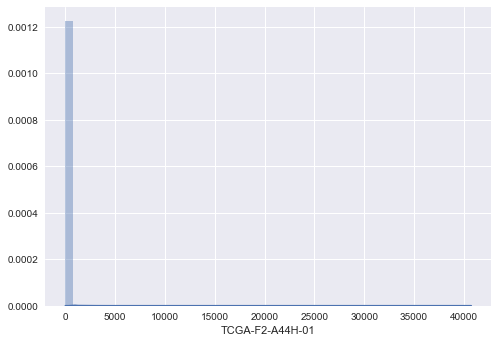

In [28]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

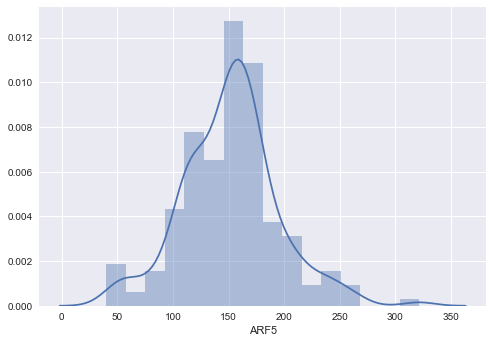

In [29]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [30]:
filename = path+'tcga_paad_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [31]:
normalized_matrix = matrix.copy()

In [32]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining missing values to matrix mean

In [33]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [34]:
normalized_matrix.head()

,TCGA-F2-A44H-01,TCGA-FB-A4P5-01,TCGA-HV-A5A3-11,TCGA-FB-A4P6-01,TCGA-HV-A5A3-01,TCGA-H6-A45N-01,TCGA-M8-A5N4-01,TCGA-F2-A44G-01,TCGA-HZ-A4BH-01,TCGA-HZ-A4BK-01,...,TCGA-3A-A9IH-01,TCGA-FB-AAPS-01,TCGA-3A-A9IB-01,TCGA-2L-AAQI-01,TCGA-2L-AAQJ-01,TCGA-3A-A9IS-01,TCGA-3A-A9IU-01,TCGA-2L-AAQM-01,TCGA-XD-AAUL-01,TCGA-3A-A9IN-01
A1BG,0.141942,0.097052,0.141942,0.141942,0.033500,0.141942,0.141942,0.141942,0.141942,0.141942,...,0.141942,0.141942,0.375165,0.141942,0.141942,0.141942,0.141942,0.316690,0.141942,0.030959
A1CF,0.310980,0.435911,0.398337,4.322000,0.086575,1.788790,0.452486,0.921323,0.975764,2.405320,...,0.197462,0.109606,0.682085,0.588016,0.316667,12.043400,0.191275,4.025850,0.950107,2.651810
A2M,173.973000,214.234000,303.303000,282.366000,66.291900,281.233000,169.729000,97.679100,236.687000,189.542000,...,156.092000,346.140000,288.644000,141.243000,161.281000,41.489400,115.303000,226.649000,294.447000,153.629000
A2ML1,0.130166,0.194390,0.038831,0.233079,4.164060,0.116391,0.084493,2.549480,0.106022,0.102582,...,2.425670,0.139625,0.124035,24.697300,0.055312,0.380841,23.565300,0.186109,0.200979,0.149715
A3GALT2,0.051036,0.051036,0.051036,0.051036,0.040874,0.042781,0.089863,0.025755,0.051036,0.184307,...,0.080433,0.062411,0.051036,0.051036,0.021867,0.051036,0.051036,0.051036,0.023276,0.051036


In [35]:
normalized_matrix.shape

(19007, 183)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [36]:
samples = normalized_matrix.columns.tolist()

In [37]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [38]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [39]:
normalized_matrix.columns = samples

In [40]:
normalized_matrix.head()

,TCGA-F2-A44H-01,TCGA-FB-A4P5-01,TCGA-HV-A5A3-11,TCGA-FB-A4P6-01,TCGA-HV-A5A3-01,TCGA-H6-A45N-01,TCGA-M8-A5N4-01,TCGA-F2-A44G-01,TCGA-HZ-A4BH-01,TCGA-HZ-A4BK-01,...,TCGA-3A-A9IH-01,TCGA-FB-AAPS-01,TCGA-3A-A9IB-01,TCGA-2L-AAQI-01,TCGA-2L-AAQJ-01,TCGA-3A-A9IS-01,TCGA-3A-A9IU-01,TCGA-2L-AAQM-01,TCGA-XD-AAUL-01,TCGA-3A-A9IN-01
A1BG,-0.714171,-0.764637,-0.639068,-0.653831,-1.292282,-0.651203,-0.654801,-0.619121,-0.587248,-0.652582,...,-0.672711,-0.640578,-0.246285,-0.677207,-0.673189,-0.666875,-0.653431,-0.309747,-0.664807,-1.361704
A1CF,-0.373549,-0.112244,-0.190928,0.829744,-0.879927,0.449246,-0.151306,0.193180,0.249987,0.576480,...,-0.529338,-0.752854,0.013331,-0.059928,-0.324696,1.261763,-0.523883,0.794476,0.160855,0.571048
A2M,2.374201,2.579247,2.690698,2.644871,2.004139,2.645753,2.422845,2.218570,2.634816,2.473013,...,2.368559,2.746563,2.639855,2.320650,2.382284,1.798951,2.256300,2.544972,2.652090,2.333979
A2ML1,-0.751784,-0.462967,-1.201999,-0.438438,0.802196,-0.737394,-0.880091,0.635220,-0.713962,-0.793622,...,0.560010,-0.647725,-0.726963,1.563332,-1.082483,-0.238242,1.566732,-0.540614,-0.513767,-0.677229
A3GALT2,-1.158404,-1.043764,-1.083301,-1.098064,-1.205873,-1.172063,-0.853329,-1.360370,-1.031481,-0.539151,...,-0.919388,-0.997425,-1.112630,-1.121440,-1.485518,-1.111109,-1.097664,-1.102504,-1.450006,-1.144617


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [41]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [42]:
normalized_matrix.head()

,TCGA-F2-A44H-01,TCGA-FB-A4P5-01,TCGA-HV-A5A3-11,TCGA-FB-A4P6-01,TCGA-HV-A5A3-01,TCGA-H6-A45N-01,TCGA-M8-A5N4-01,TCGA-F2-A44G-01,TCGA-HZ-A4BH-01,TCGA-HZ-A4BK-01,...,TCGA-3A-A9IH-01,TCGA-FB-AAPS-01,TCGA-3A-A9IB-01,TCGA-2L-AAQI-01,TCGA-2L-AAQJ-01,TCGA-3A-A9IS-01,TCGA-3A-A9IU-01,TCGA-2L-AAQM-01,TCGA-XD-AAUL-01,TCGA-3A-A9IN-01
A1BG,-0.636245,-0.928562,-0.650671,-0.855950,-1.340070,-0.866480,-0.624252,-0.654780,-0.768459,-0.731387,...,-0.669831,-0.727007,-0.207857,-0.711616,-0.529730,-0.558857,-0.616498,-0.243519,-0.679535,-1.351007
A1CF,-0.259859,-0.329638,-0.200248,0.651025,-0.905956,0.251677,-0.105451,0.201580,0.059386,0.468336,...,-0.527305,-0.842157,0.032989,-0.115818,-0.188106,1.218651,-0.493932,0.850301,0.105019,0.661635
A2M,2.551269,2.530498,2.698095,2.618056,1.989662,2.652442,2.387820,2.194293,2.562924,2.453589,...,2.277056,2.714019,2.571650,2.271470,2.365725,1.765780,2.180596,2.554550,2.543167,2.516936
A2ML1,-0.674553,-0.648871,-1.224805,-0.671984,0.807674,-0.935435,-0.859584,0.646401,-0.881097,-0.862068,...,0.559792,-0.732893,-0.675730,1.527634,-0.979492,-0.081086,1.531480,-0.486762,-0.540496,-0.714756
A3GALT2,-1.115791,-1.186608,-1.099573,-1.251719,-1.251376,-1.325697,-0.831532,-1.430170,-1.176839,-0.623370,...,-0.908115,-1.082129,-1.065846,-1.148067,-1.415174,-1.053583,-1.085507,-1.087174,-1.450752,-1.156209


# Normalize Matrix (z-score the rows)

In [43]:
mf.zscore(normalized_matrix, 'row')

In [44]:
normalized_matrix.head()

,TCGA-F2-A44H-01,TCGA-FB-A4P5-01,TCGA-HV-A5A3-11,TCGA-FB-A4P6-01,TCGA-HV-A5A3-01,TCGA-H6-A45N-01,TCGA-M8-A5N4-01,TCGA-F2-A44G-01,TCGA-HZ-A4BH-01,TCGA-HZ-A4BK-01,...,TCGA-3A-A9IH-01,TCGA-FB-AAPS-01,TCGA-3A-A9IB-01,TCGA-2L-AAQI-01,TCGA-2L-AAQJ-01,TCGA-3A-A9IS-01,TCGA-3A-A9IU-01,TCGA-2L-AAQM-01,TCGA-XD-AAUL-01,TCGA-3A-A9IN-01
A1BG,0.289818,-2.232562,0.165333,-1.606004,-5.783433,-1.696867,0.393303,0.129877,-0.851051,-0.531159,...,0.000000,-0.493363,3.986338,-0.360557,1.208924,0.957593,0.460214,3.678610,-0.083729,-5.877805
A1CF,-0.441815,-0.580883,-0.323012,1.373554,-1.729470,0.577665,-0.134082,0.477822,0.194433,1.009460,...,-0.974827,-1.602320,0.141824,-0.154745,-0.298813,2.504819,-0.908316,1.770706,0.285379,1.394701
A2M,0.435315,0.360926,0.961145,0.674500,-1.575990,0.797649,-0.150051,-0.843137,0.477053,0.085488,...,-0.546735,1.018175,0.508304,-0.566742,-0.229181,-2.377787,-0.892190,0.447063,0.406299,0.312356
A2ML1,-0.100633,-0.049254,-1.201480,-0.095495,2.864744,-0.622560,-0.470811,2.542097,-0.513851,-0.475781,...,2.368825,-0.217350,-0.102989,4.305111,-0.710702,1.086669,4.312806,0.275065,0.167563,-0.181064
A3GALT2,0.030658,-0.352281,0.118358,-0.704367,-0.702511,-1.104400,1.567778,-1.669335,-0.299455,2.693405,...,1.153656,0.212684,0.300734,-0.143875,-1.588242,0.367046,0.194415,0.185406,-1.780634,-0.187901


# Merge Like Column (by taking the mean)

In [45]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [46]:
normalized_matrix.shape

(19007, 183)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [47]:
mf.mapgenesymbols(normalized_matrix)

In [48]:
normalized_matrix.shape

(18583, 183)

# Merge Duplicate Genes By Rows

In [49]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [50]:
normalized_matrix.shape

(18493, 183)

# Histogram of First Sample

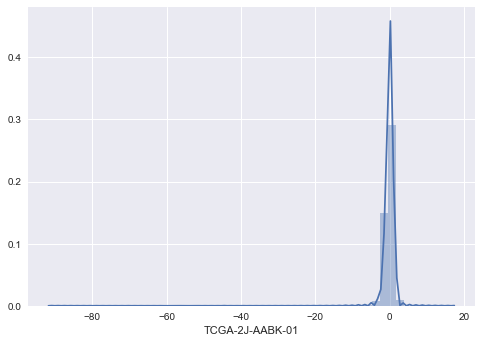

In [51]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

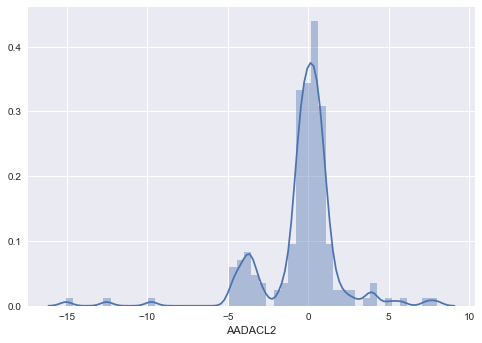

In [52]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [53]:
filename = path+'tcga_paad_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [54]:
gene_list = mf.createGeneList(normalized_matrix)

In [55]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [56]:
gene_list.shape

(18493, 2)

# Save Gene List

In [57]:
filename = path+'tcga_paad_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [58]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [59]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [60]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-2J-AAB1-01,65,MALE,M0,N1,T3,Stage IIB,Pancreas-Adenocarcinoma-Other Subtype,Primary Solid Tumor,Pancreas,G3
TCGA-2J-AAB4-01,48,MALE,M0,N1,T2,Stage IIB,Pancreas-Adenocarcinoma-Other Subtype,Primary Solid Tumor,Pancreas,G2
TCGA-2J-AAB6-01,75,MALE,M0,N0,T3,Stage IIA,Pancreas-Adenocarcinoma Ductal Type,Primary Solid Tumor,Pancreas,G2
TCGA-2J-AAB8-01,71,MALE,M0,N1,T3,Stage IIB,Pancreas-Adenocarcinoma Ductal Type,Primary Solid Tumor,Pancreas,G3
TCGA-2J-AAB9-01,70,FEMALE,M0,N1,T3,Stage IIB,Pancreas-Adenocarcinoma Ductal Type,Primary Solid Tumor,Pancreas,G1


In [61]:
attribute_list.shape

(183, 10)

# Save Attribute List

In [62]:
filename = path+'tcga_paad_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [63]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [64]:
standard_matrix.head()

,TCGA-2J-AAB1-01,TCGA-2J-AAB4-01,TCGA-2J-AAB6-01,TCGA-2J-AAB8-01,TCGA-2J-AAB9-01,TCGA-2J-AABA-01,TCGA-2J-AABE-01,TCGA-2J-AABF-01,TCGA-2J-AABH-01,TCGA-2J-AABI-01,...,TCGA-XD-AAUH-01,TCGA-XD-AAUI-01,TCGA-XD-AAUL-01,TCGA-XN-A8T3-01,TCGA-XN-A8T5-01,TCGA-YB-A89D-01,TCGA-YB-A89D-11,TCGA-YH-A8SY-01,TCGA-YY-A8LH-01,TCGA-Z5-AAPL-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.018444,-0.451254,0.171507,-0.604136,-0.243697,-0.331132,-0.189075,-0.680545,-0.964448,0.597874,...,-0.691526,-0.429438,-0.047114,-0.374816,-0.920783,-0.418571,0.094975,0.455687,0.466607,-0.145406
A1CF,0.034869,0.002153,-0.598624,-0.183552,-0.205445,-0.445717,-0.664149,0.647189,0.341000,-0.980749,...,0.384695,0.493948,0.231627,-0.238199,-0.500296,0.483025,-0.467613,-0.849752,0.253528,-0.882513
A2M,0.158133,-0.082232,-0.628366,-0.071300,0.573603,-0.257086,-0.289838,0.365832,-0.180542,-0.945006,...,0.759691,0.322091,0.322091,0.245598,0.398641,0.420459,0.693959,-0.617428,-0.934075,-0.246124
A2ML1,0.477531,-0.298373,0.926288,0.182447,0.773011,0.827749,0.444747,-0.003387,-0.505808,0.860587,...,-0.691526,-0.243697,0.127738,-0.320177,-0.200026,-0.101708,-0.473136,0.893438,0.007565,0.379178
A3GALT2,0.049446,-0.114399,-0.540403,-0.354734,-0.278318,0.453884,-0.507585,-0.321967,0.322691,0.979145,...,-0.835262,-0.169007,-0.780656,0.902596,-0.562265,-0.179929,-0.704209,-0.518602,0.847830,-0.005198


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

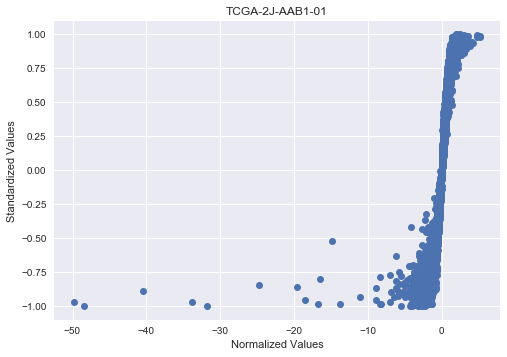

In [65]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [66]:
filename = path+'tcga_paad_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [67]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [68]:
tertiary_matrix.head()

,TCGA-2J-AAB1-01,TCGA-2J-AAB4-01,TCGA-2J-AAB6-01,TCGA-2J-AAB8-01,TCGA-2J-AAB9-01,TCGA-2J-AABA-01,TCGA-2J-AABE-01,TCGA-2J-AABF-01,TCGA-2J-AABH-01,TCGA-2J-AABI-01,...,TCGA-XD-AAUH-01,TCGA-XD-AAUI-01,TCGA-XD-AAUL-01,TCGA-XN-A8T3-01,TCGA-XN-A8T5-01,TCGA-YB-A89D-01,TCGA-YB-A89D-11,TCGA-YH-A8SY-01,TCGA-YY-A8LH-01,TCGA-Z5-AAPL-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [69]:
filename = path+'tcga_paad_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [70]:
name = 'tcga_paad_gene_up_set'

In [71]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [72]:
name = 'tcga_paad_gene_down_set'

In [73]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [74]:
name = 'tcga_paad_attribute_up_set'

In [75]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [76]:
name = 'tcga_paad_attribute_down_set'

In [77]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [78]:
attribute_normalized_matrix = normalized_matrix.copy()

In [79]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [80]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [81]:
attribute_similarity_matix.head()

,"(Donor:TCGA-2J-AAB1, Age:65.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Pancreas-Adenocarcinoma-Other Subtype, Tissue:Pancreas, Tumor:Primary, GradeG3)","(Donor:TCGA-2J-AAB4, Age:48.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Pancreas-Adenocarcinoma-Other Subtype, Tissue:Pancreas, Tumor:Primary, GradeG2)","(Donor:TCGA-2J-AAB6, Age:75.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG2)","(Donor:TCGA-2J-AAB8, Age:71.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG3)","(Donor:TCGA-2J-AAB9, Age:70.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG1)","(Donor:TCGA-2J-AABA, Age:55.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG2)","(Donor:TCGA-2J-AABE, Age:73.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG2)","(Donor:TCGA-2J-AABF, Age:73.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG3)","(Donor:TCGA-2J-AABH, Age:61.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Pancreas-Adenocarcinoma-Other Subtype, Tissue:Pancreas, Tumor:Primary, GradeG3)","(Donor:TCGA-2J-AABI, Age:55.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Pancreas-Adenocarcinoma-Other Subtype, Tissue:Pancreas, Tumor:Primary, GradeG3)",...,"(Donor:TCGA-XD-AAUH, Age:57.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG2)","(Donor:TCGA-XD-AAUI, Age:50.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG2)","(Donor:TCGA-XD-AAUL, Age:56.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG2)","(Donor:TCGA-XN-A8T3, Age:67.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IB, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG2)","(Donor:TCGA-XN-A8T5, Age:53.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IB, Histology:Pancreas-Adenocarcinoma-Other Subtype, Tissue:Pancreas, Tumor:Primary, GradeG2)","(Donor:TCGA-YB-A89D, Age:59.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG2)","(Donor:TCGA-YB-A89D, Age:59.0, Gender:MALE, SampleType:Solid Tissue Normal, Stage:Stage IIB, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG2)","(Donor:TCGA-YH-A8SY, Age:73.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Pancreas-Adenocarcinoma-Other Subtype, Tissue:Pancreas, Tumor:Primary, GradeG2)","(Donor:TCGA-YY-A8LH, Age:61.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG3)","(Donor:TCGA-Z5-AAPL, Age:74.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Pancreas-Adenocarcinoma Ductal Type, Tissue:Pancreas, Tumor:Primary, GradeG1)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-2J-AAB1, Age:65.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Pancreas-Adenocarcinoma-Other Subtype, Tissue:Pancreas, Tumor:Primary, GradeG3)",1.000000,0.120558,-0.021921,0.012823,0.065354,0.084057,0.146620,0.076614,0.164234,0.017469,...,0.016400,0.04

# Save Attribute Similarity Matrix

In [82]:
filename = path+'tcga_paad_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [83]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [84]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [85]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.025343,-0.238302,-0.047606,0.156247,-0.030810,0.091259,0.095727,0.004091,0.100406,...,0.179303,0.202333,-0.027123,-0.028710,0.113167,-0.080809,-0.163928,-0.159749,-0.151365,-0.120754
A1CF,0.025343,1.000000,0.036332,-0.380203,-0.162690,-0.371755,0.268835,0.214589,0.483260,0.198227,...,-0.382803,-0.322074,0.178176,0.141772,-0.179885,-0.222036,0.101317,-0.398626,0.300817,0.061279
A2M,-0.238302,0.036332,1.000000,-0.258183,-0.275852,0.067942,0.115837,-0.211950,-0.060315,-0.050889,...,-0.206987,-0.379022,0.115729,-0.121715,-0.337179,-0.278445,0.455132,0.384290,0.184771,0.293852
A2ML1,-0.047606,-0.380203,-0.258183,1.000000,-0.049043,0.258069,-0.259953,-0.129283,-0.131957,-0.174884,...,0.196267,0.156103,-0.269576,-0.235092,0.126680,0.052494,-0.034143,0.031547,-0.202374,0.002256
A3GALT2,0.156247,-0.162690,-0.275852,-0.049043,1.000000,-0.011220,-0.170614,0.091314,-0.142935,0.000586,...,0.007230,0.131478,-0.108510,-0.039244,0.143899,0.088089,-0.198492,-0.071716,-0.070471,-0.197263


# Save Gene Similarity Matrix

In [86]:
filename = path+'tcga_paad_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [87]:
name = 'tcga_padd_gene_attribute_edge_list'

In [88]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  183 Out of 183   

 The number of statisticaly relevent gene-attribute associations is: 169642
